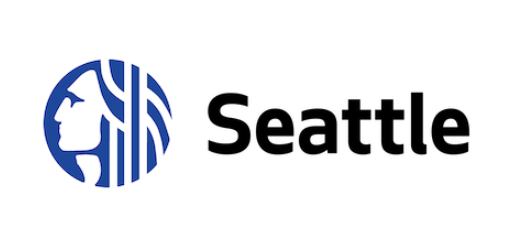

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', 80)

# Contexte
Vous travaillez pour la ville de Seattle. Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, votre équipe s’intéresse de près à la consommation et aux émissions des bâtiments non destinés à l’habitation.
Des relevés minutieux ont été effectués par les agents de la ville en 2016. Voici les données et leur source. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation pour lesquels elles n’ont pas encore été mesurées.



# Objectifs
Vous cherchez également à évaluer l’intérêt de l’**ENERGY STAR Score** pour la prédiction d’émissions, qui est fastidieux à calculer avec l’approche utilisée actuellement par votre équipe. Vous l'intégrerez dans la modélisation et jugerez de son intérêt.

In [2]:
df = pd.read_csv('Building_Benchmarking.csv') 

In [3]:
df_log = pd.read_csv('Building_Log_Benchmarking.csv') 

Head() pour afficher les 5 premières lignes du dataframe `df`.

In [4]:
df.head()

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,pourcentage_LargestPropertyUseTypeGFA,pourcentage_SecondLargestPropertyUseTypeGFA,pourcentage_ThirdLargestPropertyUseTypeGFA
0,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,Downtown,47.612190,-122.337997,1927,1.0,12.0,88434,0.0,88434.0,Hotel,Hotel,NaN,NaN,65.0,78.9,173.5,6981428.0,2023032.0,3686160.0,1272388.0,249.43,100.00,0.00,0.00
1,2015,NonResidential,Hotel,PARAMOUNT HOTEL,Downtown,47.613106,-122.333358,1996,1.0,11.0,103566,15064.0,88502.0,"Hotel, Parking, Restaurant",Hotel,Parking,Restaurant,51.0,94.4,191.3,8354235.0,0.0,3905411.0,4448985.0,263.51,80.99,14.55,4.46
2,2015,NonResidential,Hotel,WESTIN HOTEL,Downtown,47.613349,-122.337699,1969,1.0,41.0,961990,0.0,961990.0,"Hotel, Parking, Swimming Pool",Hotel,Parking,Swimming Pool,18.0,96.6,242.7,73130656.0,19660404.0,49762435.0,3709900.0,2061.48,78.72,10.40,0.00
3,2015,NonResidential,Hotel,HOTEL MAX,Downtown,47.614216,-122.336609,1926,1.0,10.0,61320,0.0,61320.0,Hotel,Hotel,NaN,NaN,1.0,460.4,636.3,28229320.0,23458518.0,2769023.0,2001894.0,1936.34,100.00,0.00,0.00
4,2015,Nonresidential COS,Other,WEST PRECINCT (SEATTLE POLICE),Downtown,47.616439,-122.336764,1999,1.0,2.0,97288,37198.0,60090.0,Police Station,Police Station,NaN,NaN,NaN,135.7,313.5,12051984.0,0.0,7271004.0,4781283.0,304.62,91.31,0.00,0.00


la taille du dataframe avec shape

In [5]:
df.shape

(2673, 28)

min, max, moyenne, écart type, etc) pour toutes les variables quantitatives avec describes

In [6]:
df.describe()

,DataYear,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,pourcentage_LargestPropertyUseTypeGFA,pourcentage_SecondLargestPropertyUseTypeGFA,pourcentage_ThirdLargestPropertyUseTypeGFA
count,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2.673000e+03,2673.000000,2.673000e+03,1786.000000,2673.000000,2673.000000,2.673000e+03,2.673000e+03,2.673000e+03,2.673000e+03,2673.000000,2673.000000,2673.000000,2673.000000
mean,2015.512159,47.614631,-122.333680,1960.830902,1.114478,4.255892,1.184587e+05,14944.705574,1.035140e+05,64.709966,71.815315,178.229667,7.788243e+06,4.036805e+05,5.685170e+06,1.658526e+06,158.876382,82.241639,13.391953,2.136435
std,0.499946,0.046705,0.024014,32.959168,2.376356,6.493173,2.682779e+05,46772.888152,2.498151e+05,28.472265,74.106285,188.164722,2.455264e+07,4.331792e+06,1.816393e+07,5.854038e+06,549.954191,20.127371,21.170102,6.352247
min,2015.000000,47.499170,-122.411820,1900.000000,1.000000,0.000000,1.128500e+04,0.000000,1.092500e+04,1.000000,0.200000,0.000000,1.144100e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.080000,18.350000,0.000000,0.000000
25%,2015.000000,47.585060,-122.343180,1929.000000,1.000000,1.000000,2.907900e+04,0.000000,2.812600e+04,48.000000,33.100000,77.400000,1.181429e+06,0.000000e+00,7.006280e+05,0.000000e+00,19.170000,66.230000,0.000000,0.000000
50%,2016.000000,47.611660,-122.333350,1965.000000,1.000000,2.000000,4.885000e+04,0.000000,4.671000e+04,72.000000,51.799999,132.800003,2.457017e+06,0.000000e+00,1.596307e+06,4.229940e+05,47.180000,90.860000,1.990000,0.000000
75%,2016.000000,47.646330,-122.322899,1988.000000,1.000000,4.000000,1.068600e+05,0.000000,9.542600e+04,88.000000,81.400002,205.300003,6.787070e+06,0.000000e+00,4.855382e+06,1.331883e+06,133.700000,100.000000,24.950000,0.000000
max,2016.000000,47.733870,-122.258640,2015.000000,111.000000,76.000000,9.320156e+06,512608.000000,9.320156e+06,100.000000,834.400024,2620.000000,8.739237e+08,1.349435e+08,6.570744e+08,1.381912e+08,12307.160000,100.000000,630.150000,150.940000


In [7]:
df.columns

Index(['DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'pourcentage_LargestPropertyUseTypeGFA',
       'pourcentage_SecondLargestPropertyUseTypeGFA',
       'pourcentage_ThirdLargestPropertyUseTypeGFA'],
      dtype='object')

In [8]:
for col in df.columns:
    print(f'{col :-<70} {df[col].nunique()}')

DataYear-------------------------------------------------------------- 2
BuildingType---------------------------------------------------------- 4
PrimaryPropertyType--------------------------------------------------- 18
PropertyName---------------------------------------------------------- 2577
Neighborhood---------------------------------------------------------- 13
Latitude-------------------------------------------------------------- 2509
Longitude------------------------------------------------------------- 2429
YearBuilt------------------------------------------------------------- 113
NumberofBuildings----------------------------------------------------- 14
NumberofFloors-------------------------------------------------------- 43
PropertyGFATotal------------------------------------------------------ 1384
PropertyGFAParking---------------------------------------------------- 319
PropertyGFABuilding(s)------------------------------------------------ 1397
ListOfAllPropertyUseTypes---

In [9]:
#info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2673 entries, 0 to 2672
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   DataYear                                     2673 non-null   int64  
 1   BuildingType                                 2673 non-null   object 
 2   PrimaryPropertyType                          2673 non-null   object 
 3   PropertyName                                 2673 non-null   object 
 4   Neighborhood                                 2673 non-null   object 
 5   Latitude                                     2673 non-null   float64
 6   Longitude                                    2673 non-null   float64
 7   YearBuilt                                    2673 non-null   int64  
 8   NumberofBuildings                            2673 non-null   float64
 9   NumberofFloors                               2673 non-null   float64
 10  

# Feature Engineering

## Build Age

In [10]:
df['Build_Age'] = df['DataYear'] - df['YearBuilt']

In [11]:
df['Build_Age'].max()

116

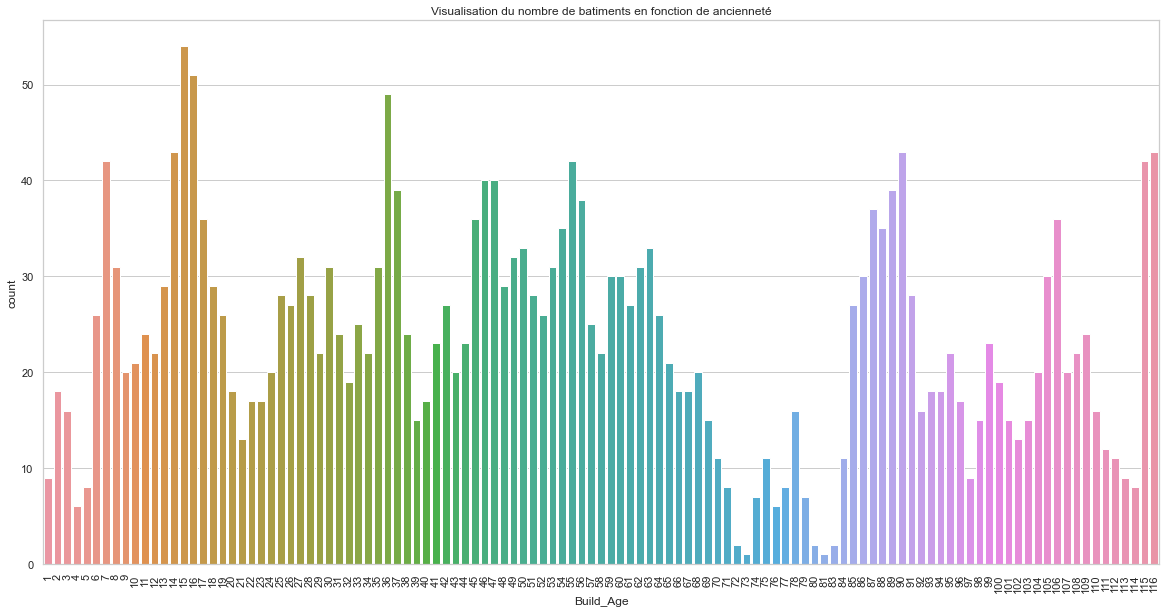

In [12]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1)
sns.set_style('whitegrid')
sns.countplot(x='Build_Age', data=df).set(title='Visualisation du nombre de batiments en fonction de ancienneté')
plt.tick_params(axis='x', rotation=90)
plt.show()

In [13]:
df.drop(['DataYear','YearBuilt'], axis=1, inplace=True)

## Surface Nb de Building

In [14]:
df = df.assign(surface_nb_building=lambda x: round( x['PropertyGFATotal'] / x['NumberofBuildings'], 2))

In [15]:
df.drop(['NumberofBuildings'], axis=1, inplace=True)

## Energy
Nous calculons le poucentage de chaque energy ('SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu) en fonction de l'énergy total use

In [16]:
df = df.assign(pourcentage_Electricity=lambda x: round( x['Electricity(kBtu)'] / x['SiteEnergyUse(kBtu)']*100, 2))

In [17]:
df = df.assign(pourcentage_NaturalGas=lambda x: round( x['NaturalGas(kBtu)'] / x['SiteEnergyUse(kBtu)']*100, 2))

In [18]:
df = df.assign(pourcentage_SteamUse=lambda x: round( x['SteamUse(kBtu)'] / x['SiteEnergyUse(kBtu)']*100, 2))

In [19]:
df[[ 'pourcentage_Electricity', 'pourcentage_NaturalGas', 'pourcentage_SteamUse']]

,pourcentage_Electricity,pourcentage_NaturalGas,pourcentage_SteamUse
0,52.80,18.23,28.98
1,46.75,53.25,0.00
2,68.05,5.07,26.88
3,9.81,7.09,83.10
4,60.33,39.67,0.00
...,...,...,...
2668,61.70,38.30,0.00
2669,41.73,58.27,0.00
2670,31.08,68.92,0.00
2671,48.49,51.51,0.00


In [20]:
df.drop(['Electricity(kBtu)','NaturalGas(kBtu)','SteamUse(kBtu)'], axis=1, inplace=True)

# Prediction Energy sans ENERGYSTARScore

In [21]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,roc_auc_score,median_absolute_error
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from math import sqrt
import scipy.stats as stats
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler
import time

## Preprocessing
scaling, encoding

### Log transform

In [22]:
to_log = ['PropertyGFATotal',
          'PropertyGFAParking', 'PropertyGFABuilding(s)',
          'SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 
          'TotalGHGEmissions']

In [23]:
# apply log(x+1) element-wise to a subset of columns
df_log = df[to_log].applymap(lambda x: np.log(x+1))

# rename columns
df_log.columns = 'log_' + df_log.columns

In [24]:
df_log_cat = pd.concat((df[['LargestPropertyUseType', 'SecondLargestPropertyUseType',
                       'ThirdLargestPropertyUseType', 'surface_nb_building', 'NumberofFloors',
                            'pourcentage_LargestPropertyUseTypeGFA',
                            'pourcentage_SecondLargestPropertyUseTypeGFA',
                            'pourcentage_ThirdLargestPropertyUseTypeGFA', 'pourcentage_Electricity',
                           'pourcentage_NaturalGas', 'pourcentage_SteamUse', 'ENERGYSTARScore']], df_log,),  axis=1)

### LabelEncoder

In [25]:
occurring_cat = [cat for cat in df_log_cat.LargestPropertyUseType.value_counts().sort_values(ascending = False).head(40).index]

In [26]:
for cat in occurring_cat:
    df_log_cat[cat] = np.where((df_log_cat['LargestPropertyUseType'] == cat)|
                           (df_log_cat['SecondLargestPropertyUseType'] == cat)|
                           (df_log_cat['ThirdLargestPropertyUseType'] == cat), 1, 0) 

In [27]:
df_log_cat

,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,surface_nb_building,NumberofFloors,pourcentage_LargestPropertyUseTypeGFA,pourcentage_SecondLargestPropertyUseTypeGFA,pourcentage_ThirdLargestPropertyUseTypeGFA,pourcentage_Electricity,pourcentage_NaturalGas,pourcentage_SteamUse,ENERGYSTARScore,log_PropertyGFATotal,log_PropertyGFAParking,log_PropertyGFABuilding(s),log_SiteEUI(kBtu/sf),log_SourceEUI(kBtu/sf),log_SiteEnergyUse(kBtu),log_TotalGHGEmissions,Small- and Mid-Sized Office,Warehouse,K-12 School,Other,Retail Store,Hotel,Worship Facility,Distribution Center,Medical Office,Supermarket / Grocery Store,Self-Storage Facility,Other - Recreation,Parking,Other - Entertainment/Public Assembly,University,Restaurant,Refrigerated Warehouse,Social/Meeting Hall,Laboratory,Automobile Dealership,Manufacturing/Industrial Plant,"Repair Services (Vehicle, Shoe, Locksmith, etc)",Museum,Urgent Care/Clinic/Other Outpatient,Bank Branch,Library,Hospital (General Medical & Surgical),Other - Services,Fitness Center/Health Club/Gym,Other - Mall,Financial Office,Other - Education,Strip Mall,Other/Specialty Hospital,Performing Arts,Data Center,Adult Education,Pre-school/Daycare,Other - Restaurant/Bar,Prison/Incarceration
0,Hotel,NaN,NaN,88434.0,12.0,100.00,0.00,0.00,52.80,18.23,28.98,65.0,11.390023,0.000000,11.390023,4.380776,5.161925,15.758764,5.523179,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Hotel,Parking,Restaurant,103566.0,11.0,80.99,14.55,4.46,46.75,53.25,0.00,51.0,11.547974,9.620129,11.390792,4.558079,5.259057,15.938279,5.577879,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hotel,Parking,Swimming Pool,961990.0,41.0,78.72,10.40,0.00,68.05,5.07,26.88,18.0,13.776760,0.000000,13.776760,4.580877,5.495938,18.107758,7.631664,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Hotel,NaN,NaN,61320.0,10.0,100.00,0.00,0.00,9.81,7.09,83.10,1.0,11.023878,0.000000,11.023878,6.134265,6.457241,17.155872,7.569071,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Police Station,NaN,NaN,97288.0,2.0,91.31,0.00,0.00,60.33,39.67,0.00,NaN,11.485441,10.524037,11.003615,4.917789,5.750984,16.304740,5.722343,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668,Small- and Mid-Sized Office,NaN,NaN,12294.0,1.0,100.00,0.00,0.00,61.70,38.30,0.00,46.0,9.416948,0.000000,9.416948,4.249923,5.091908,13.652694,3.088311,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2669,Other - Recreation,NaN,NaN,16000.0,1.0,100.00,0.00,0.00,41.73,58.27,0.00,NaN,9.680406,0.000000,9.680406,4.100989,4.746670,13.764509,3.501646,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2670,Other - Recreation,Fitness Center/Health Club/Gym,Swimming Pool,13157.0,1.0,57.63,42.37,0.00,31.08,68.92,0.00,NaN,9.484785,0.000000,9.484785,6.084955,6.614457,15.567472,5.414054,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2671,Other - Recreation,Fitness Center/Health Club/Gym,Pre-school/Daycare,14101.0,1.0,46.81,46.10,3.43,48.49,51.51,0.00,NaN,9.554072,0.000000,9.554072,3.951244,4.666265,13.486273,3.140265,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


### Encodage GFA

In [28]:
# colonne pour la surface GFA log_pourcentage_LargestPropertyUseTypeGFA
gfa_col = 'pourcentage_LargestPropertyUseTypeGFA'

# colonne pour le type de propriété
property_col = 'LargestPropertyUseType'

# liste des colonnes features
features_cols = ['Small- and Mid-Sized Office', 'Warehouse',
                 'K-12 School', 'Other', 'Retail Store', 'Hotel', 'Worship Facility',
                 'Distribution Center', 'Medical Office', 'Supermarket / Grocery Store',
                 'Self-Storage Facility', 'Other - Recreation', 'Parking',
                 'Other - Entertainment/Public Assembly', 'University', 'Restaurant',
                 'Refrigerated Warehouse', 'Social/Meeting Hall', 'Laboratory',
                 'Manufacturing/Industrial Plant', 'Automobile Dealership',
                 'Repair Services (Vehicle, Shoe, Locksmith, etc)', 'Museum',
                 'Hospital (General Medical & Surgical)', 'Library', 'Other - Services',
                 'Bank Branch', 'Urgent Care/Clinic/Other Outpatient', 'Other - Mall',
                 'Other - Education', 'Fitness Center/Health Club/Gym',
                 'Financial Office', 'Other/Specialty Hospital', 'Strip Mall',
                 'Performing Arts', 'Data Center', 'Pre-school/Daycare',
                 'Adult Education', 'Other - Restaurant/Bar', 'Prison/Incarceration']

# Boucle pour chaque feature
for feature in features_cols:
    # Selection des lignes ou la feature de type de propriété est égale à la feature en cours de traitement
    mask = df_log_cat[property_col] == feature
    # Assignation de la valeur de la colonne gfa_col à la colonne feature en cours de traitement
    df_log_cat.loc[mask, feature] = df_log_cat.loc[mask, gfa_col]

In [29]:
# colonne pour la surface GFA log_pourcentage_SecondLargestPropertyUseTypeGFA
gfa_col = 'pourcentage_SecondLargestPropertyUseTypeGFA'

# colonne pour le type de propriété
property_col = 'SecondLargestPropertyUseType'

# liste des colonnes features
features_cols = ['Small- and Mid-Sized Office', 'Warehouse',
                 'K-12 School', 'Other', 'Retail Store', 'Hotel', 'Worship Facility',
                 'Distribution Center', 'Medical Office', 'Supermarket / Grocery Store',
                 'Self-Storage Facility', 'Other - Recreation', 'Parking',
                 'Other - Entertainment/Public Assembly', 'University', 'Restaurant',
                 'Refrigerated Warehouse', 'Social/Meeting Hall', 'Laboratory',
                 'Manufacturing/Industrial Plant', 'Automobile Dealership',
                 'Repair Services (Vehicle, Shoe, Locksmith, etc)', 'Museum',
                 'Hospital (General Medical & Surgical)', 'Library', 'Other - Services',
                 'Bank Branch', 'Urgent Care/Clinic/Other Outpatient', 'Other - Mall',
                 'Other - Education', 'Fitness Center/Health Club/Gym',
                 'Financial Office', 'Other/Specialty Hospital', 'Strip Mall',
                 'Performing Arts', 'Data Center', 'Pre-school/Daycare',
                 'Adult Education', 'Other - Restaurant/Bar', 'Prison/Incarceration']

# Boucle pour chaque feature
for feature in features_cols:
    # Selection des lignes ou la feature de type de propriété est égale à la feature en cours de traitement
    mask = df_log_cat[property_col] == feature
    # Assignation de la valeur de la colonne gfa_col à la colonne feature en cours de traitement
    df_log_cat.loc[mask, feature] = df_log_cat.loc[mask, gfa_col]

In [30]:
# colonne pour la surface GFA log_pourcentage_ThirdLargestPropertyUseTypeGFA
gfa_col ='pourcentage_ThirdLargestPropertyUseTypeGFA'

# colonne pour le type de propriété
property_col ='ThirdLargestPropertyUseType'

# liste des colonnes features
features_cols = ['Small- and Mid-Sized Office', 'Warehouse',
                 'K-12 School', 'Other', 'Retail Store', 'Hotel', 'Worship Facility',
                 'Distribution Center', 'Medical Office', 'Supermarket / Grocery Store',
                 'Self-Storage Facility', 'Other - Recreation', 'Parking',
                 'Other - Entertainment/Public Assembly', 'University', 'Restaurant',
                 'Refrigerated Warehouse', 'Social/Meeting Hall', 'Laboratory',
                 'Manufacturing/Industrial Plant', 'Automobile Dealership',
                 'Repair Services (Vehicle, Shoe, Locksmith, etc)', 'Museum',
                 'Hospital (General Medical & Surgical)', 'Library', 'Other - Services',
                 'Bank Branch', 'Urgent Care/Clinic/Other Outpatient', 'Other - Mall',
                 'Other - Education', 'Fitness Center/Health Club/Gym',
                 'Financial Office', 'Other/Specialty Hospital', 'Strip Mall',
                 'Performing Arts', 'Data Center', 'Pre-school/Daycare',
                 'Adult Education', 'Other - Restaurant/Bar', 'Prison/Incarceration']

# Boucle pour chaque feature
for feature in features_cols:
    # Selection des lignes ou la feature de type de propriété est égale à la feature en cours de traitement
    mask = df_log_cat[property_col] == feature
    # Assignation de la valeur de la colonne gfa_col à la colonne feature en cours de traitement
    df_log_cat.loc[mask, feature] = df_log_cat.loc[mask, gfa_col]

In [31]:
df_log_cat.drop(['LargestPropertyUseType', 'SecondLargestPropertyUseType',
                 'ThirdLargestPropertyUseType', 'pourcentage_LargestPropertyUseTypeGFA',
                 'pourcentage_SecondLargestPropertyUseTypeGFA',
                 'pourcentage_ThirdLargestPropertyUseTypeGFA',
                 'ENERGYSTARScore'],axis=1, inplace=True)

In [32]:
df_log_cat.isna().sum()

surface_nb_building                                0
NumberofFloors                                     0
pourcentage_Electricity                            0
pourcentage_NaturalGas                             0
pourcentage_SteamUse                               0
log_PropertyGFATotal                               0
log_PropertyGFAParking                             0
log_PropertyGFABuilding(s)                         0
log_SiteEUI(kBtu/sf)                               0
log_SourceEUI(kBtu/sf)                             0
log_SiteEnergyUse(kBtu)                            0
log_TotalGHGEmissions                              0
Small- and Mid-Sized Office                        0
Warehouse                                          0
K-12 School                                        0
Other                                              0
Retail Store                                       0
Hotel                                              0
Worship Facility                              

In [33]:
df_log_ = df_log_cat.copy()

In [34]:
# Sélection des variables X et y
X=df_log_.drop(['log_SiteEnergyUse(kBtu)','log_TotalGHGEmissions'],axis=1)
y= df_log_['log_TotalGHGEmissions']

### Trains Test Split

In [35]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)

In [36]:
X_train.shape

(2138, 50)

In [37]:
X_test.shape

(535, 50)

In [38]:
DummyReg_mean = DummyRegressor(strategy='mean')
DummyReg_median = DummyRegressor(strategy='median')
LinearR = LinearRegression()
Lasso = Lasso()
Ridge = Ridge()
Elastic = ElasticNet()
GardienBoostingR = GradientBoostingRegressor()
RFR = RandomForestRegressor()
ExtraTR = ExtraTreesRegressor()

## Modelisation sans Energystarscore

La normalisation des données est généralement recommandée pour les modèles de régression linéaire (LinearRegression, Lasso, Ridge, ElasticNet)

Les modèles de régression linéaire utilisent des fonctions linéaires pour effectuer des prévisions, et la normalisation des données peut aider à éviter que certaines caractéristiques n'aient une influence excessive sur les résultats en raison de leurs grandes échelles.

In [39]:
def evaluation(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    N, train_scores, val_scores = learning_curve(
        model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

    fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
    axes[0].plot(N, train_scores.mean(axis=1), '--',
             color="#110011",  label="Training score")
    axes[0].plot(N, val_scores.mean(axis=1), color="#834651",
             label="Cross-validation score")
    axes[0].set_title(f'{model}Learning Curve')
    axes[0].set_xlabel("Training Set Size")
    axes[0].set_ylabel("RMSE Score")

    axes[1].plot(y_train, y_train, c='red', lw=3)
    axes[1].scatter(y_test, y_test_pred, alpha=.6)
    axes[1].set_xlabel('Y Test Actual')
    axes[1].set_ylabel('Y Test Predicted')
    axes[1].set_title(f'{model}Predicted Y value by Actual Y value on Testing Data, Full Model')

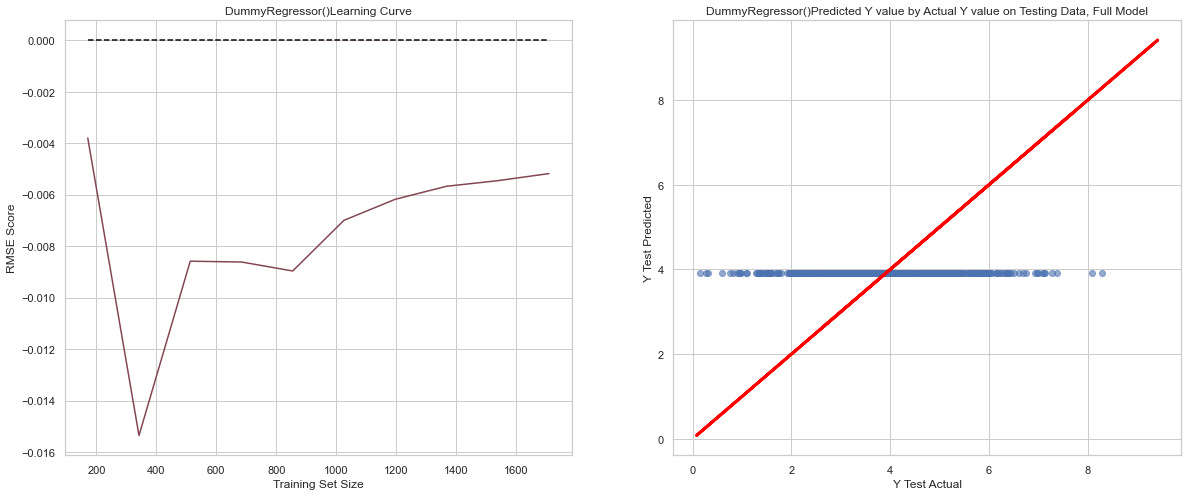

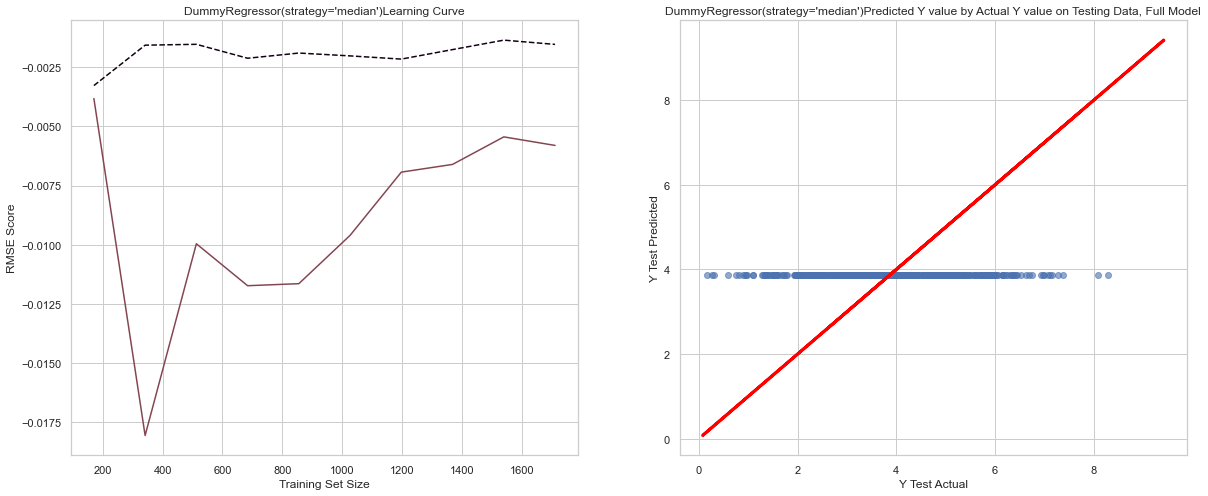

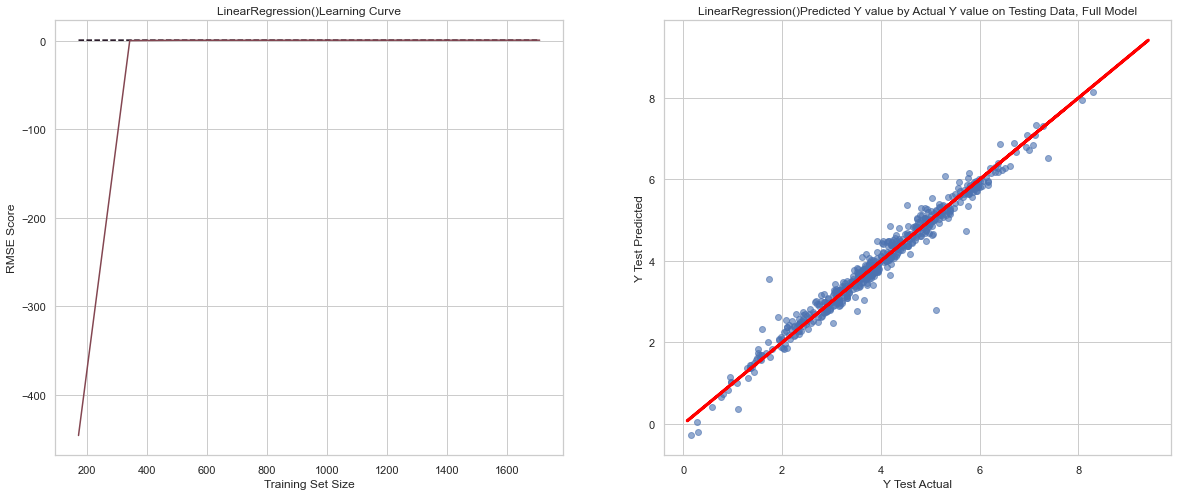

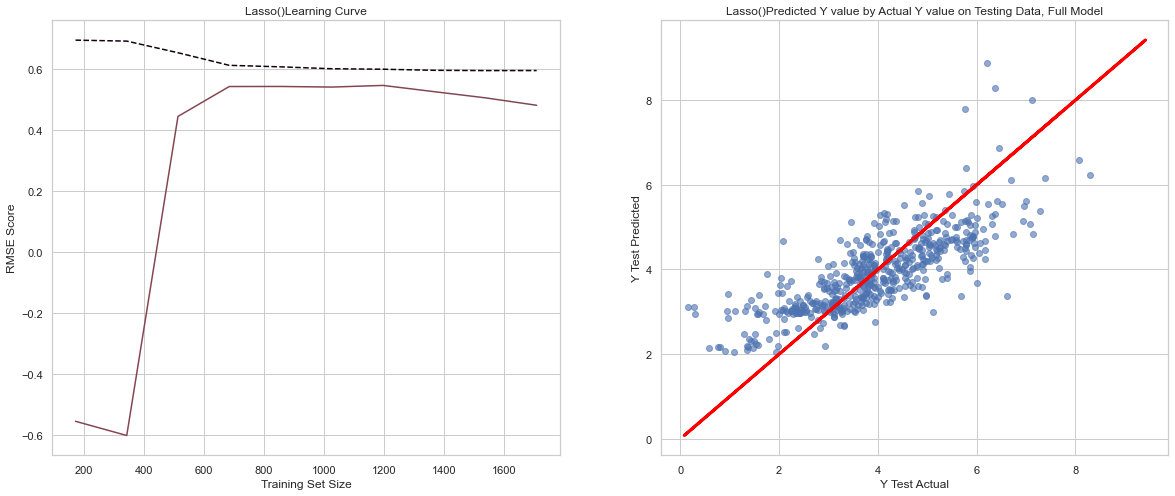

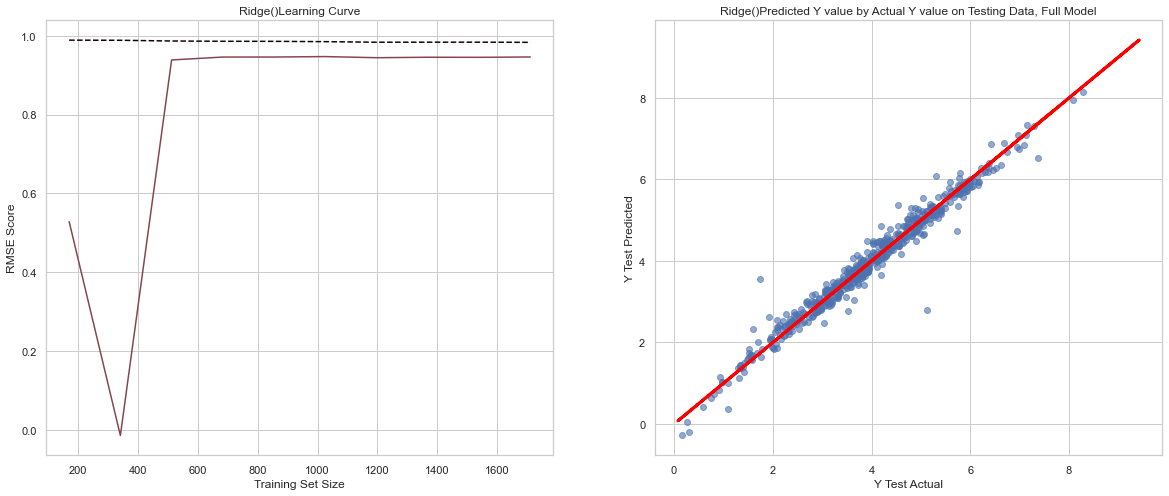

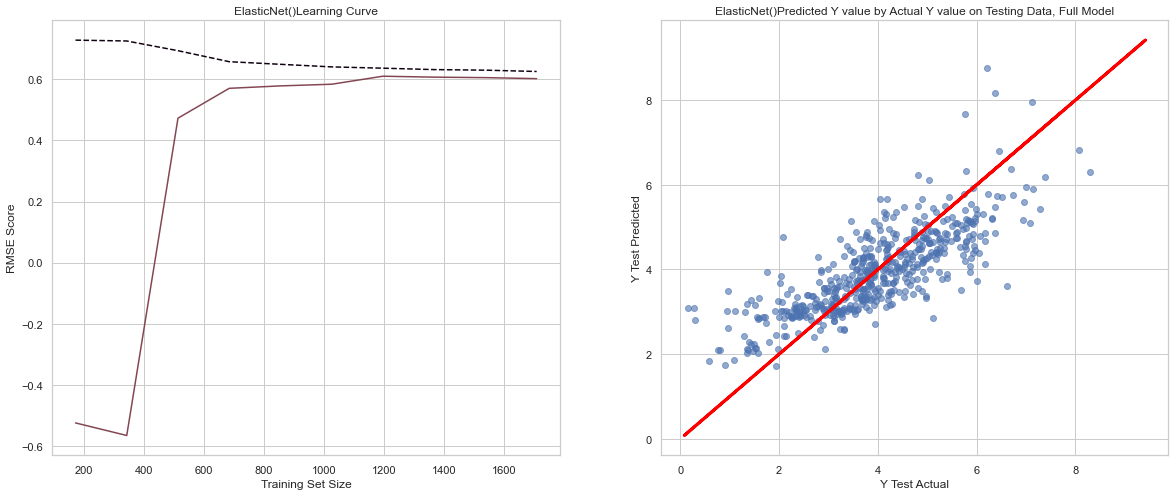

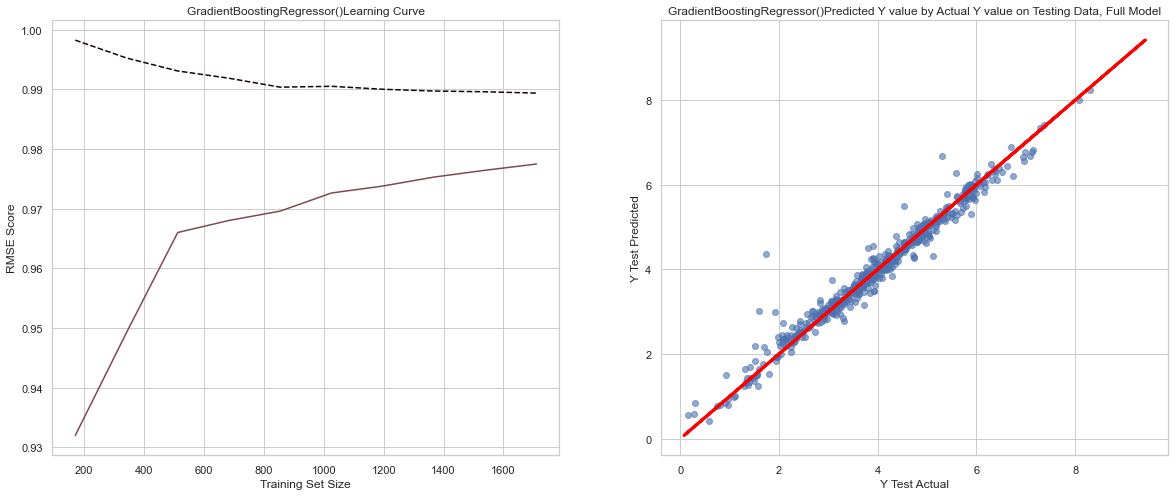

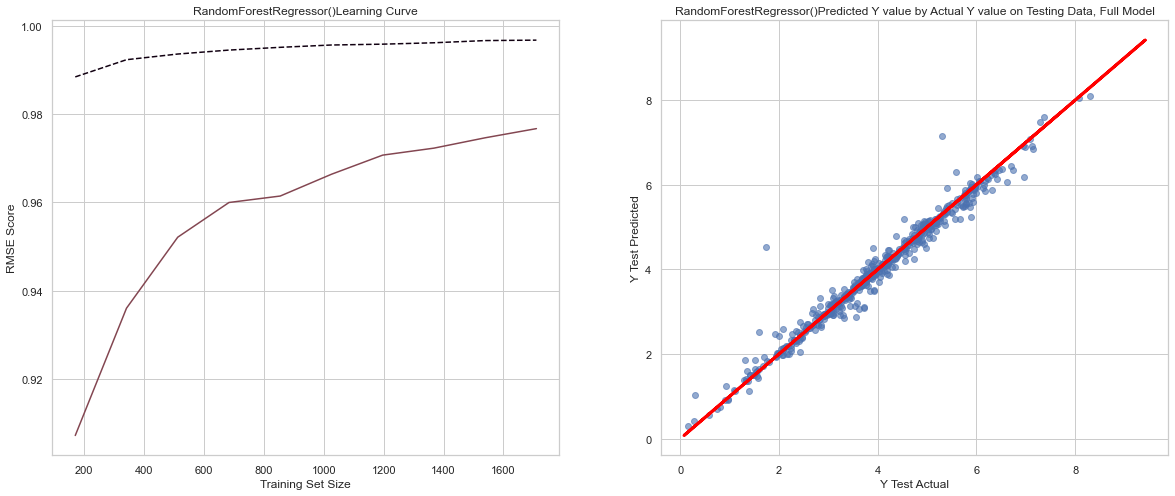

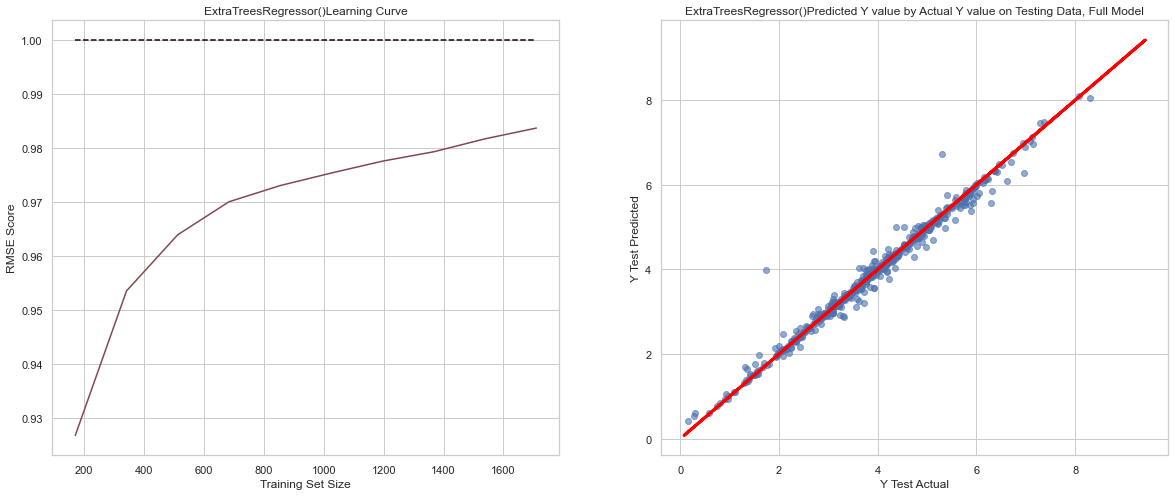

In [40]:
# Entraîner et évaluer les modèles
models = {'dummy_regr_mean': DummyReg_mean,
          'dummy_regr_median': DummyReg_median,
          'linear': LinearR,
          'lasso': Lasso,
          'ridge': Ridge,
          'elastic': Elastic,
          'GB': GardienBoostingR,
          'rfr': RFR,
          'ETR': ExtraTR}

results = {}
for name, model in models.items():
    # Début de la mesure du temps
    start_time = time.time()
    model.fit(X_train, y_train)
     # Fin de la mesure du temps
    end_time = time.time()
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_test_pred)
    tr_mae = median_absolute_error(y_train, y_train_pred)
    valid_mae = median_absolute_error(y_test, y_test_pred)
    train_rmse = mean_squared_error(y_train,y_train_pred)**0.5
    valid_rmse = mean_squared_error(y_test,y_test_pred)**0.5
    # Calcul du temps d'entraînement
    training_time = end_time - start_time
    results[name] = [round(r2,3),round(tr_mae,3), round(valid_mae,3), round(train_rmse,3), round(valid_rmse,3),training_time]
    evaluation(model)

In [41]:
results_df = pd.DataFrame(results).T
results_df.columns = ["R2","Train MAE", "Validation MAE","Train RMSE", "Valid RMSE",'Temps']
results_df.sort_values(by='Validation MAE',ascending=True)

,R2,Train MAE,Validation MAE,Train RMSE,Valid RMSE,Temps
ETR,0.982,0.000,0.043,0.000,0.182,1.233664
rfr,0.971,0.027,0.072,0.076,0.233,1.962751
GB,0.968,0.078,0.101,0.149,0.244,0.638293
linear,0.968,0.128,0.133,0.188,0.244,0.009934
ridge,0.968,0.128,0.133,0.188,0.243,0.003988
elastic,0.617,0.534,0.558,0.890,0.846,0.004985
lasso,0.594,0.561,0.569,0.923,0.871,0.005982
dummy_regr_mean,-0.000,0.960,0.886,1.448,1.367,0.000998
dummy_regr_median,-0.004,0.962,0.895,1.449,1.369,0.000000


* Mean Absolute Error (MAE) : MAE signifie erreur absolue moyenne. Il s'agit d'une mesure de performance couramment utilisée pour les modèles de régression pour évaluer la différence entre les valeurs prévues et les valeurs réelles. Il est calculé en prenant la somme des erreurs absolues pour chaque observation et en divisant par le nombre total d'observations.
* RMSE signifie erreur quadratique moyenne. Il s'agit d'une autre mesure de performance couramment utilisée pour les modèles de régression pour évaluer la différence entre les valeurs prévues et les valeurs réelles. Il est calculé en prenant la somme des erreurs au carré pour chaque observation, en divisant par le nombre total d'observations et en prenant la racine carrée du résultat.

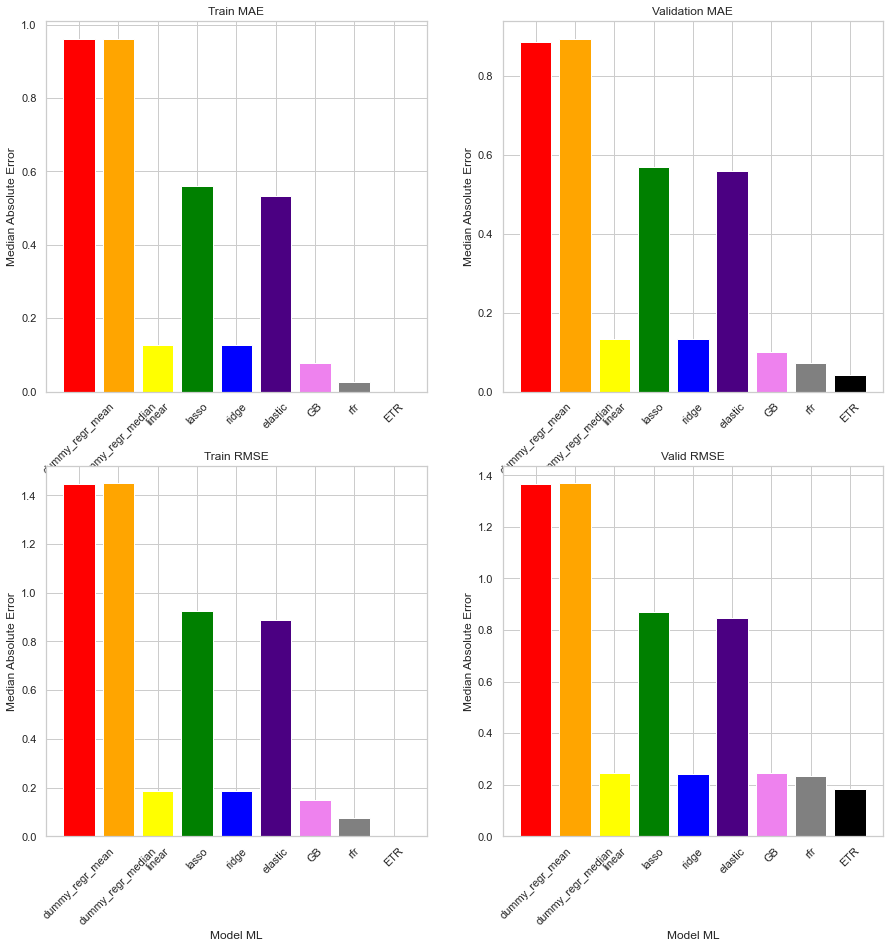

In [42]:
# Créer une figure avec 4 sous-graphes
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'gray', 'black']

for i, color in enumerate(colors):
    axs[0, 0].bar(results_df.index[i], results_df['Train MAE'][i], color=color)
    axs[0, 0].set_title("Train MAE")
    axs[0, 0].set_xlabel("Model ML")
    axs[0, 0].set_ylabel("Median Absolute Error")
    axs[0, 0].set_xticklabels(results_df.index, rotation=45)
    
    axs[0, 1].bar(results_df.index[i], results_df['Validation MAE'][i], color=color)
    axs[0, 1].set_title("Validation MAE")
    axs[0, 1].set_xlabel("Model ML")
    axs[0, 1].set_ylabel("Median Absolute Error")
    axs[0, 1].set_xticklabels(results_df.index, rotation=45)
    
    axs[1, 0].bar(results_df.index[i], results_df['Train RMSE'][i], color=color)
    axs[1, 0].set_title("Train RMSE")
    axs[1, 0].set_xlabel("Model ML")
    axs[1, 0].set_ylabel("Median Absolute Error")
    axs[1, 0].set_xticklabels(results_df.index, rotation=45)
    
    axs[1, 1].bar(results_df.index[i], results_df['Valid RMSE'][i], color=color)
    axs[1, 1].set_title("Valid RMSE")
    axs[1, 1].set_xlabel("Model ML")
    axs[1, 1].set_ylabel("Median Absolute Error")
    axs[1, 1].set_xticklabels(results_df.index, rotation=45)
plt.show()

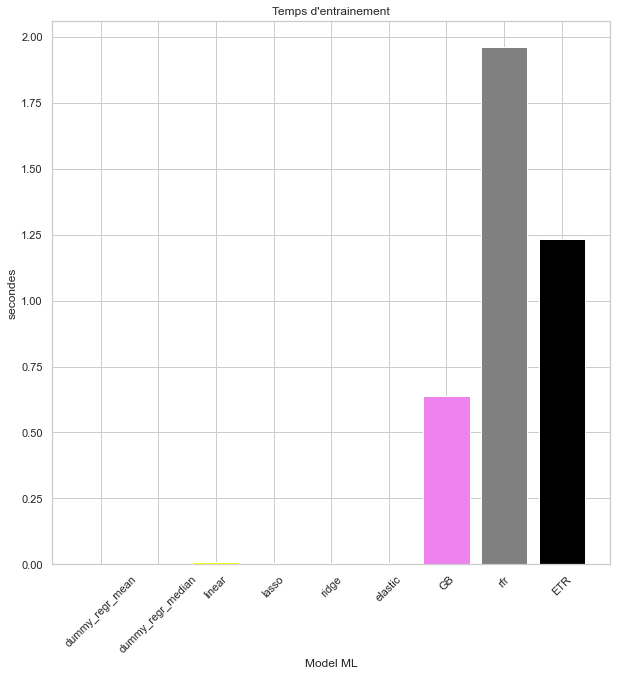

In [43]:
plt.figure(figsize=(10, 10))
plt.bar(results_df.index, results_df['Temps'], color=colors)
plt.title("Temps d'entrainement")
plt.xlabel("Model ML")
plt.ylabel("secondes")
plt.xticks(rotation=45)
plt.show()

## Optimisation sans Energystarscore


### GradientBoostingRegressor

GradientBoostingRegressor est un modèle de régression implémentant l'algorithme de Gradient Boosting. Il a plusieurs hyperparamètres qui peuvent être utilisés pour ajuster les performances de l'algorithme. Voici quelques-uns des hyperparamètres les plus couramment utilisés pour GradientBoostingRegressor :

* n_estimators : Nombre d'arbres de décision à utiliser dans l'ensemble.

* learning_rate : Taux d'apprentissage utilisé pour réduire la perte lors de chaque itération.

* max_depth : Profondeur maximale de chaque arbre de décision.

* min_samples_split : Nombre minimal d'échantillons requis pour diviser un noeud.

* min_samples_leaf : Nombre minimal d'échantillons requis pour être un noeud terminal.

* subsample : La fraction des données d'entraînement à utiliser pour chaque arbre.

* max_features : Nombre maximal de features à considérer pour chaque séparation.

* loss : La fonction de perte utilisée pour l'optimisation.

* alpha : La régularisation L1 utilisée pour réduire le surapprentissage.

* random_state : Pour reproduire les résultats de l'entraînement.

In [44]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

# Hyperparameters for GradientBoostingRegressor
hyper_param = {'n_estimators':  range(140, 160, 5),
              'min_samples_leaf':range(30,71,10),
              'max_depth': [1, 3, 5],
              'learning_rate': [0.1, 0.01, 0.001]}

In [45]:

model_cv = RandomizedSearchCV(GardienBoostingR,
                              hyper_param,
                              cv=folds,
                              scoring='r2',
                              n_iter=30)

In [46]:
model_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=GradientBoostingRegressor(), n_iter=30,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': [1, 3, 5],
                                        'min_samples_leaf': range(30, 71, 10),
                                        'n_estimators': range(140, 160, 5)},
                   scoring='r2')

In [47]:
print(model_cv.best_params_)

{'n_estimators': 155, 'min_samples_leaf': 30, 'max_depth': 5, 'learning_rate': 0.1}


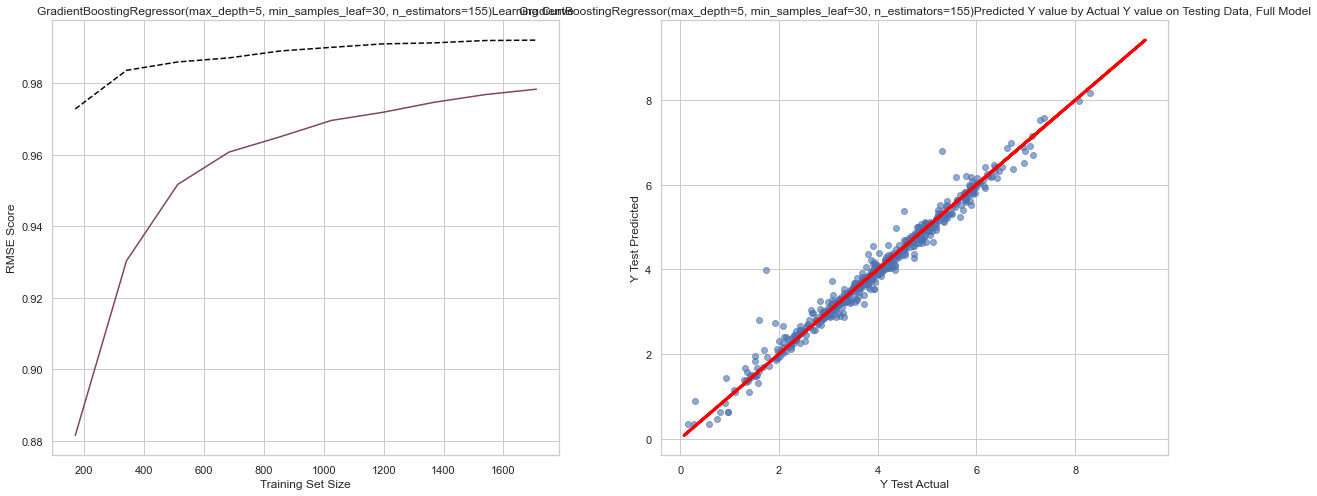

In [48]:
# Entraîner et évaluer le model optimisé
models = {'GB_opt': model_cv.best_estimator_}


results_opt = {}
for name, model in models.items():
    # Début de la mesure du temps
    start_time = time.time()
    model.fit(X_train, y_train)
     # Fin de la mesure du temps
    end_time = time.time()
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_test_pred)
    tr_mae = median_absolute_error(y_train, y_train_pred)
    valid_mae = median_absolute_error(y_test, y_test_pred)
    train_rmse = mean_squared_error(y_train,y_train_pred)**0.5
    valid_rmse = mean_squared_error(y_test,y_test_pred)**0.5
    # Calcul du temps d'entraînement
    training_time = end_time - start_time
    results_opt[name] = [round(r2,3),round(tr_mae,3), round(valid_mae,3), round(train_rmse,3), round(valid_rmse,3),training_time]
    evaluation(model)

In [49]:
results_opt_df = pd.DataFrame(results_opt).T
results_opt_df.columns = ["R2","Train MAE", "Validation MAE","Train RMSE", "Valid RMSE",'Temps']
df_resultat= pd.concat([results_df, results_opt_df],  axis=0)
df_resultat.sort_values(by='Validation MAE',ascending=True)

,R2,Train MAE,Validation MAE,Train RMSE,Valid RMSE,Temps
ETR,0.982,0.000,0.043,0.000,0.182,1.233664
rfr,0.971,0.027,0.072,0.076,0.233,1.962751
GB_opt,0.975,0.057,0.081,0.126,0.216,1.844069
GB,0.968,0.078,0.101,0.149,0.244,0.638293
linear,0.968,0.128,0.133,0.188,0.244,0.009934
ridge,0.968,0.128,0.133,0.188,0.243,0.003988
elastic,0.617,0.534,0.558,0.890,0.846,0.004985
lasso,0.594,0.561,0.569,0.923,0.871,0.005982
dummy_regr_mean,-0.000,0.960,0.886,1.448,1.367,0.000998
dummy_regr_median,-0.004,0.962,0.895,1.449,1.369,0.000000


# Model vs ENERGYSTARScore 

ENERGY STAR provides a comprehensive overview of a building's energy performance, taking into account physical assets, operations, and the behavior of building occupants. It is expressed on a scale of 1 to 100 

In [50]:
#Filtrage des données ayant un Energy Star Score renseigné
df = df[df['ENERGYSTARScore'].isnull()==False]
df_log_cat = df_log_cat[df_log_cat.index.isin(list(df.index))]

In [51]:
df_log_energyscore = pd.concat([df_log_cat, df[['ENERGYSTARScore']]], axis=1)

In [52]:
# Sélection des variables X et y
X = df_log_energyscore.drop(
    ['log_SiteEnergyUse(kBtu)', 'log_TotalGHGEmissions'], axis=1)
y = df_log_energyscore['log_TotalGHGEmissions']

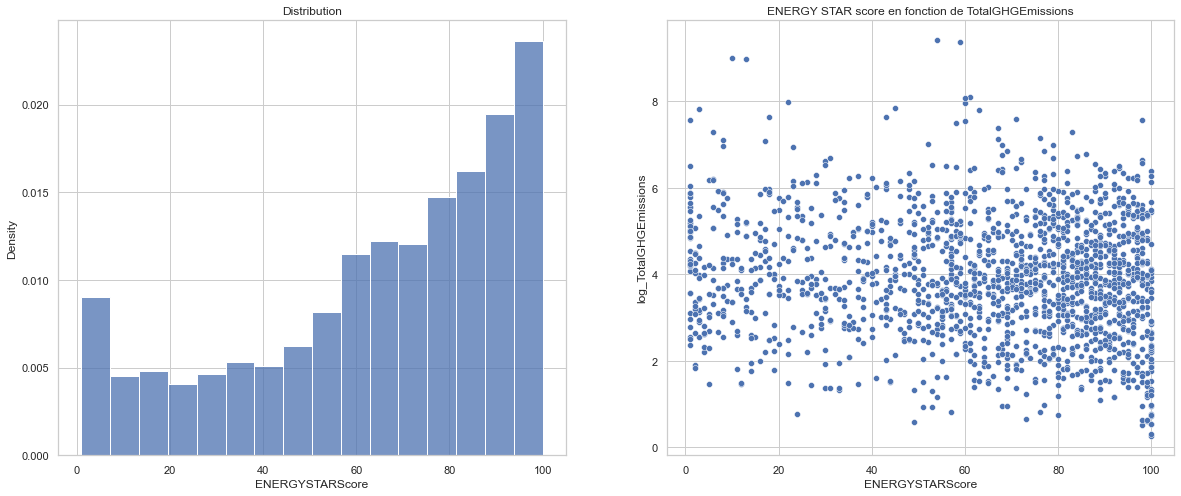

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.histplot(data=X, x='ENERGYSTARScore', stat="density", ax=axes[0])
axes[0].set_title("Distribution")
sns.scatterplot(data=pd.concat([X,y], axis=1), y='log_TotalGHGEmissions', x='ENERGYSTARScore', ax=axes[1])
axes[1].set_title("ENERGY STAR score en fonction de TotalGHGEmissions")
plt.show()

In [54]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)

In [55]:
def evaluation_energyscore(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    N, train_scores, val_scores = learning_curve(
        model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

    fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
    axes[0].plot(N, train_scores.mean(axis=1), '--',
             color="#110011",  label="Training score")
    axes[0].plot(N, val_scores.mean(axis=1), color="#834651",
             label="Cross-validation score")
    axes[0].set_title(f'{model}Learning Curve')
    axes[0].set_xlabel("Training Set Size")
    axes[0].set_ylabel("RMSE Score")

    axes[1].plot(y_train, y_train, c='red', lw=3)
    axes[1].scatter(y_test, y_pred, alpha=.6)
    axes[1].set_xlabel('Y Test Actual')
    axes[1].set_ylabel('Y Test Predicted')
    axes[1].set_title(f'{model}Predicted Y value by Actual Y value on Testing Data, Full Model')

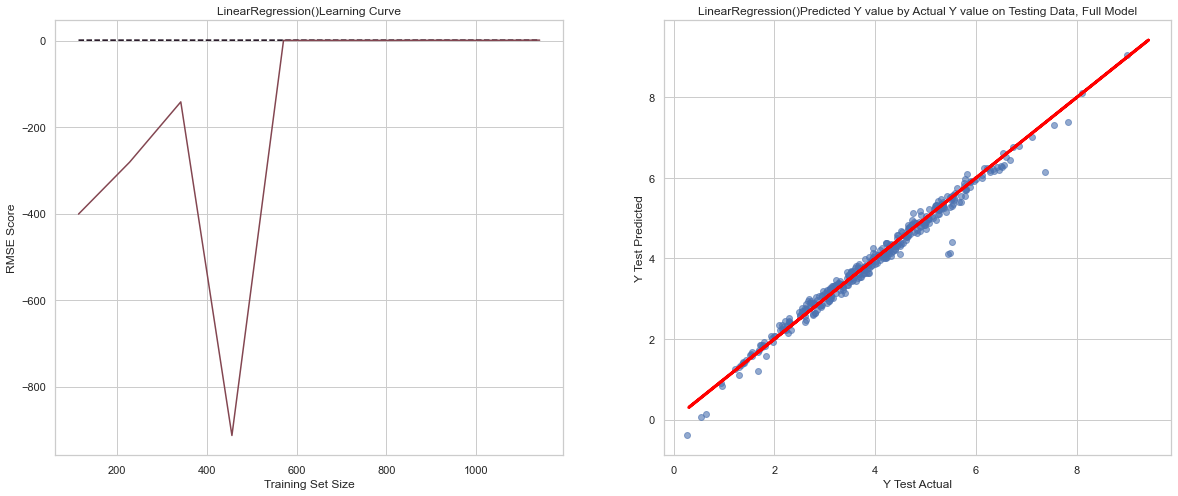

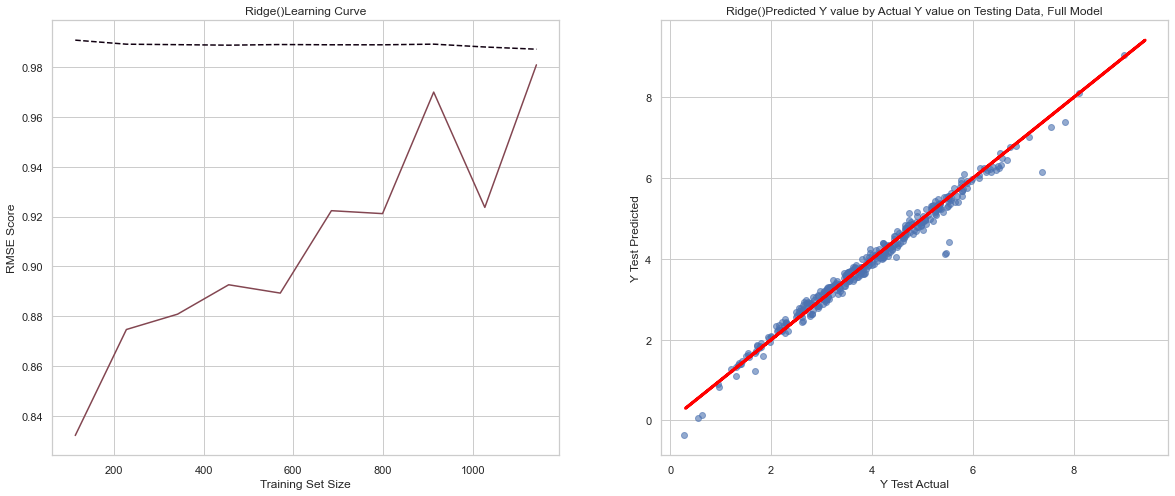

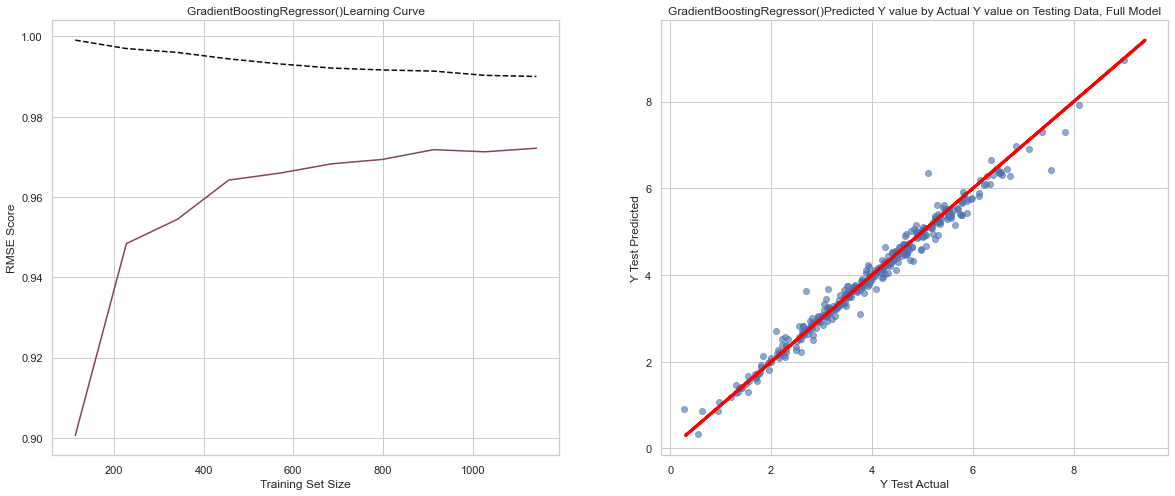

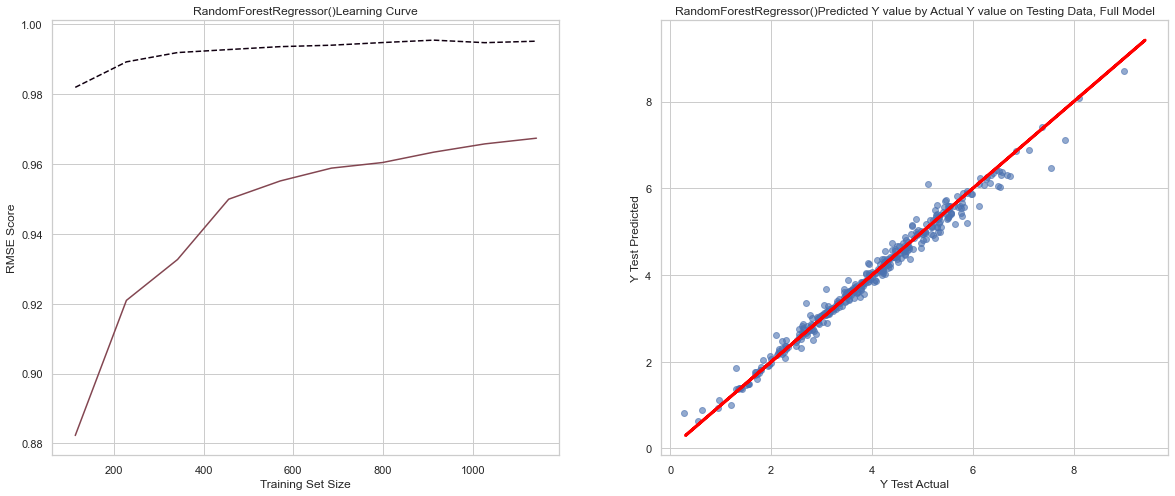

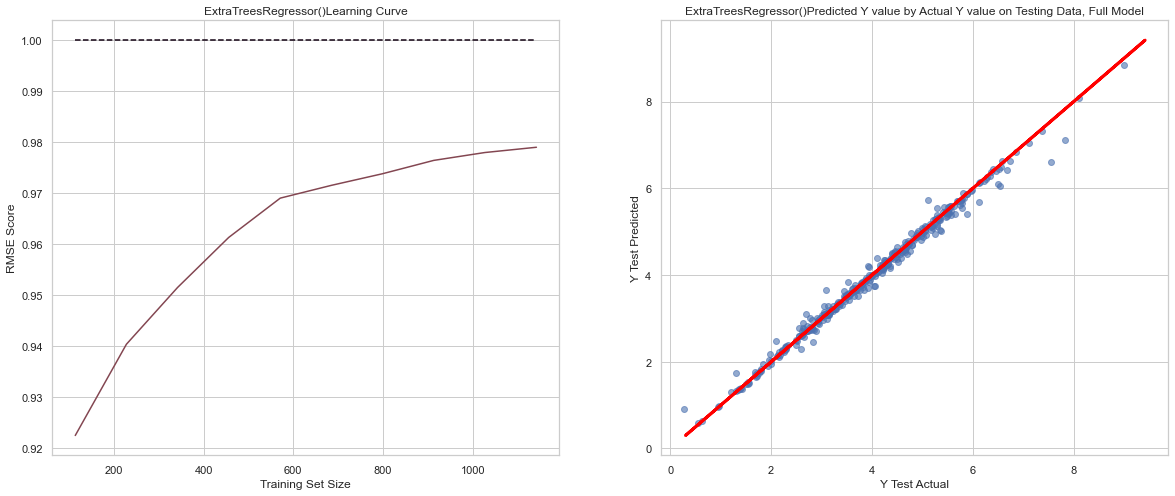

In [56]:
# Entraîner et évaluer les modèles
models = {'lr': LinearR,
          'ridge': Ridge,
          'GB': GardienBoostingR,
          'rfr': RFR,
          'ETR': ExtraTR}


results_energyscore = {}
for name, model in models.items():
    # Début de la mesure du temps
    start_time = time.time()
    model.fit(X_train, y_train)
     # Fin de la mesure du temps
    end_time = time.time()
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_test_pred)
    tr_mae = median_absolute_error(y_train, y_train_pred)
    valid_mae = median_absolute_error(y_test, y_test_pred)
    train_rmse = mean_squared_error(y_train,y_train_pred)**0.5
    valid_rmse = mean_squared_error(y_test,y_test_pred)**0.5
    # Calcul du temps d'entraînement
    training_time = end_time - start_time
    results_energyscore[name] = [round(r2,3),round(tr_mae,3), round(valid_mae,3), round(train_rmse,3), round(valid_rmse,3),training_time]
    evaluation_energyscore(model)

In [57]:
# Stocker les résultats dans un dataframe
results_energyscore_df = pd.DataFrame(results_energyscore).T
results_energyscore_df.columns = ["R2","Train MAE", "Validation MAE","Train RMSE", "Valid RMSE",'Temps']

In [58]:
print("Sans energyscore")
df_resultat.sort_values(by='Validation MAE',ascending=True)

Sans energyscore


,R2,Train MAE,Validation MAE,Train RMSE,Valid RMSE,Temps
ETR,0.982,0.000,0.043,0.000,0.182,1.233664
rfr,0.971,0.027,0.072,0.076,0.233,1.962751
GB_opt,0.975,0.057,0.081,0.126,0.216,1.844069
GB,0.968,0.078,0.101,0.149,0.244,0.638293
linear,0.968,0.128,0.133,0.188,0.244,0.009934
ridge,0.968,0.128,0.133,0.188,0.243,0.003988
elastic,0.617,0.534,0.558,0.890,0.846,0.004985
lasso,0.594,0.561,0.569,0.923,0.871,0.005982
dummy_regr_mean,-0.000,0.960,0.886,1.448,1.367,0.000998
dummy_regr_median,-0.004,0.962,0.895,1.449,1.369,0.000000


In [59]:
print("Avec energyscore")
results_energyscore_df.sort_values(by='Validation MAE',ascending=True)

Avec energyscore


,R2,Train MAE,Validation MAE,Train RMSE,Valid RMSE,Temps
ETR,0.990,0.000,0.044,0.000,0.143,0.921530
rfr,0.982,0.031,0.080,0.083,0.193,1.056176
GB,0.981,0.077,0.087,0.138,0.197,0.454783
ridge,0.981,0.114,0.112,0.155,0.198,0.003989
lr,0.981,0.113,0.113,0.155,0.198,0.009972


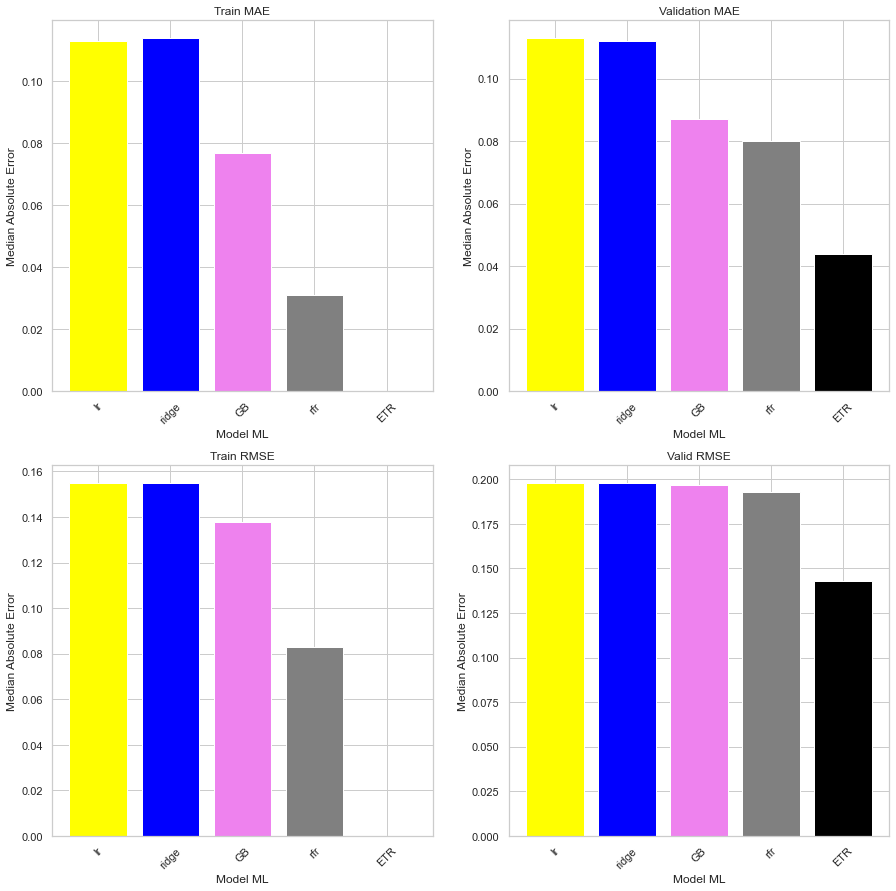

In [60]:
# Créer une figure avec 4 sous-graphes
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

colors = ['yellow', 'blue', 'violet', 'gray', 'black']

for i, color in enumerate(colors):
    axs[0, 0].bar(results_energyscore_df.index[i], results_energyscore_df['Train MAE'][i], color=color)
    axs[0, 0].set_title("Train MAE")
    axs[0, 0].set_xlabel("Model ML")
    axs[0, 0].set_ylabel("Median Absolute Error")
    axs[0, 0].set_xticklabels(results_energyscore_df.index, rotation=45)
    
    axs[0, 1].bar(results_energyscore_df.index[i], results_energyscore_df['Validation MAE'][i], color=color)
    axs[0, 1].set_title("Validation MAE")
    axs[0, 1].set_xlabel("Model ML")
    axs[0, 1].set_ylabel("Median Absolute Error")
    axs[0, 1].set_xticklabels(results_energyscore_df.index, rotation=45)
    
    axs[1, 0].bar(results_energyscore_df.index[i], results_energyscore_df['Train RMSE'][i], color=color)
    axs[1, 0].set_title("Train RMSE")
    axs[1, 0].set_xlabel("Model ML")
    axs[1, 0].set_ylabel("Median Absolute Error")
    axs[1, 0].set_xticklabels(results_energyscore_df.index, rotation=45)
    
    axs[1, 1].bar(results_energyscore_df.index[i], results_energyscore_df['Valid RMSE'][i], color=color)
    axs[1, 1].set_title("Valid RMSE")
    axs[1, 1].set_xlabel("Model ML")
    axs[1, 1].set_ylabel("Median Absolute Error")
    axs[1, 1].set_xticklabels(results_energyscore_df.index, rotation=45)
plt.show()